In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [3]:
df = pd.read_csv('Boston.csv')

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,Unnamed: 15,Unnamed: 16
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,NaN,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,NaN,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,NaN,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,NaN,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,NaN,NaN


In [5]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,Unnamed: 15,Unnamed: 16
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0,NaN,NaN
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0,NaN,NaN
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0,NaN,NaN
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0,NaN,NaN
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9,0,NaN,NaN


In [6]:
df.isnull().sum()

CRIM             0
ZN               0
INDUS            0
CHAS             0
NOX              0
RM               0
AGE              0
DIS              0
RAD              0
TAX              0
PTRATIO          0
B                0
LSTAT            0
MEDV             0
CAT. MEDV        0
Unnamed: 15    506
Unnamed: 16    506
dtype: int64

In [7]:
df.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  CAT. MEDV  Unnamed: 15  Unnamed: 16  
0       15.3  396.

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,Unnamed: 15,Unnamed: 16
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,0.0,0.0
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,0.166008,NaN,NaN
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.372456,NaN,NaN
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000,NaN,NaN
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,0.000000,NaN,NaN
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,0.000000,NaN,NaN
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,0.000000,NaN,NaN
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000,NaN,NaN


<Axes: >

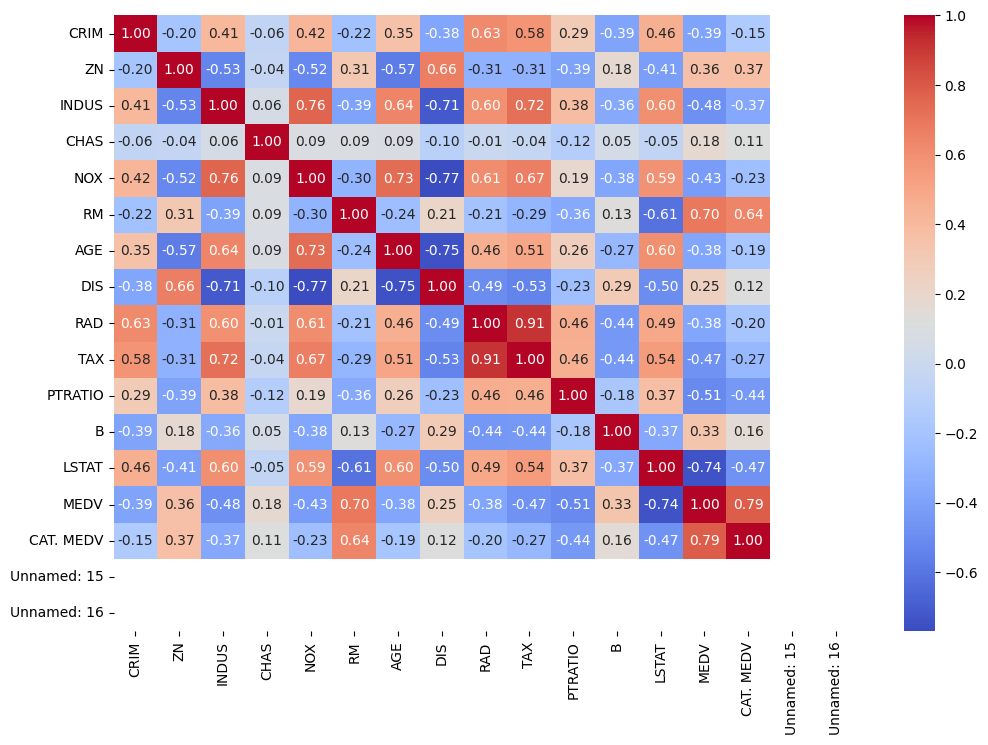

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")

In [13]:
x = df.loc[:,['LSTAT','PTRATIO','RM']]
y = df.loc[:,"MEDV"]
x.shape, y.shape

((506, 3), (506,))

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=10)

In [16]:
sc = StandardScaler()
sc.fit(xtrain)
xtrain = sc.transform(xtrain)
xtest = sc.transform(xtest)

In [17]:
model = Sequential()

In [18]:
model = Sequential()
model.add(Dense(128, input_shape=(3,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               512       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 11521 (45.00 KB)
Trainable params: 11521

In [19]:
model.fit(xtrain, ytrain, epochs=100, validation_split=0.05)

Epoch 1/100
12/12 [==============================] - 2s 35ms/step - loss: 528.7346 - mae: 21.2966 - val_loss: 668.4657 - val_mae: 23.2131
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 480.1369 - mae: 20.0550 - val_loss: 586.7339 - val_mae: 21.1768
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 366.1256 - mae: 17.0607 - val_loss: 417.4435 - val_mae: 16.9483
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 183.7784 - mae: 11.7937 - val_loss: 216.5264 - val_mae: 11.6476
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 77.9310 - mae: 6.8944 - val_loss: 133.3556 - val_mae: 8.3821
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 45.4822 - mae: 5.2846 - val_loss: 121.2439 - val_mae: 7.7486
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 36.9003 - mae: 4.6519 - val_loss: 94.2716 - val_mae: 6.9258
Epoch 8/100
12/12 [==============================]

In [20]:
output = model.evaluate(xtest, ytest)
print(f"Mean Squared Error: {output[0]}")
print(f"Mean Absolute Error: {output[1]}")

4/4 [==============================] - 0s 3ms/step - loss: 22.2203 - mae: 3.2879
Mean Squared Error: 22.220346450805664
Mean Absolute Error: 3.2879459857940674


In [21]:
import numpy as np

# Replace with your actual input data
new_data = np.array([[5, 15, 6]])

# Get predictions
predictions = model.predict(new_data)
print(predictions)

1/1 [==============================] - 0s 187ms/step
[[30.596151]]
